In [1]:
# File to use to test the main function, utility functions, and structure. Later will move changes to functions to separate files in utils folder.

In [2]:
#imports
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import hvplot.pandas
%matplotlib inline

In [3]:
# import functions
from utils.AlpacaFunctions import get_historical_dataframe
from utils.data_process import return_rolling_averages
from utils.data_process import return_crossovers
from utils.data_process import return_weighted_crossovers
from utils.eval_functions import sma_crossover_eval
from utils.eval_functions import results_trade_amount_nostop
from utils.neural_functions import shallow_neural

In [4]:
# set ticker, start date, end date, timeframe
ticker = "COST"

today = pd.Timestamp.now(tz="America/New_York")

start_date = pd.Timestamp(today - pd.Timedelta(days=500)).isoformat()

end_date = today

timeframe = '1D'

In [5]:
df = pd.DataFrame(get_historical_dataframe(ticker, start_date, end_date, timeframe)[ticker])

In [6]:
volume_df = pd.DataFrame(df["volume"])

In [7]:
volume_df

volume
time                              
2020-09-08 00:00:00-04:00  1790301
2020-09-09 00:00:00-04:00  1590297
2020-09-10 00:00:00-04:00  1290103
2020-09-11 00:00:00-04:00  1390711
2020-09-14 00:00:00-04:00  1233397
...                            ...
2022-01-12 00:00:00-05:00  1447122
2022-01-13 00:00:00-05:00  1712665
2022-01-14 00:00:00-05:00  3215613
2022-01-18 00:00:00-05:00  2989784
2022-01-19 00:00:00-05:00  1728130

[345 rows x 1 columns]

In [8]:
close_df = pd.DataFrame(df["close"])

In [9]:
close_df.head(20)

close
time                             
2020-09-08 00:00:00-04:00  338.87
2020-09-09 00:00:00-04:00  346.42
2020-09-10 00:00:00-04:00  339.42
2020-09-11 00:00:00-04:00  339.03
2020-09-14 00:00:00-04:00  343.03
2020-09-15 00:00:00-04:00  343.88
2020-09-16 00:00:00-04:00  343.71
2020-09-17 00:00:00-04:00  339.03
2020-09-18 00:00:00-04:00  335.91
2020-09-21 00:00:00-04:00  339.58
2020-09-22 00:00:00-04:00  344.45
2020-09-23 00:00:00-04:00  344.71
2020-09-24 00:00:00-04:00  347.12
2020-09-25 00:00:00-04:00  342.58
2020-09-28 00:00:00-04:00  349.76
2020-09-29 00:00:00-04:00  352.13
2020-09-30 00:00:00-04:00  354.84
2020-10-01 00:00:00-04:00  358.45
2020-10-02 00:00:00-04:00  355.01
2020-10-05 00:00:00-04:00  358.59

In [10]:
return_rolling_averages(close_df)

In [11]:
close_df.head(20)

close        2           3        5          8  \
time                                                                         
2020-09-08 00:00:00-04:00  338.87      NaN         NaN      NaN        NaN   
2020-09-09 00:00:00-04:00  346.42  342.645         NaN      NaN        NaN   
2020-09-10 00:00:00-04:00  339.42  342.920  341.570000      NaN        NaN   
2020-09-11 00:00:00-04:00  339.03  339.225  341.623333      NaN        NaN   
2020-09-14 00:00:00-04:00  343.03  341.030  340.493333  341.354        NaN   
2020-09-15 00:00:00-04:00  343.88  343.455  341.980000  342.356        NaN   
2020-09-16 00:00:00-04:00  343.71  343.795  343.540000  341.814        NaN   
2020-09-17 00:00:00-04:00  339.03  341.370  342.206667  341.736  341.67375   
2020-09-18 00:00:00-04:00  335.91  337.470  339.550000  341.112  341.30375   
2020-09-21 00:00:00-04:00  339.58  337.745  338.173333  340.422  340.44875   
2020-09-22 00:00:00-04:00  344.45  342.015  339.980000  340.536  341.07750   
2020-09-23 00:00:00-04:00  344.71  344.580  342.913333  340.736  341.78750   
2020-09-24 00:00:00-04:00  347.12  345.915  345.426667  342.354  342.29875   
2020-09-25 00:00:00-04:00  342.58  344.850  344.803333  343.688  342.13625   
2020-09-28 00:00:00-04:00  349.76  346.170  346.486667  345.724  342.89250   
2020-09-29 00:00:00-04:00  352.13  350.945  348.156667  347.260  344.53000   
2020-09-30 00:00:00-04:00  354.84  353.485  352.243333  349.286  346.89625   
2020-10-01 00:00:00-04:00  358.45  356.645  355.140000  351.552  349.25500   
2020-10-02 00:00:00-04:00  355.01  356.730  356.100000  354.038  350.57500   
2020-10-05 00:00:00-04:00  358.59  356.800  357.350000  355.804  352.31000   

                                10          13       20  21  34  50  55  89  \
time                                                                          
2020-09-08 00:00:00-04:00      NaN         NaN      NaN NaN NaN NaN NaN NaN   
2020-09-09 00:00:00-04:00      NaN         NaN      NaN NaN NaN NaN NaN NaN   
2020-09-10 00:00:00-04:00      NaN         NaN      NaN NaN NaN NaN NaN NaN   
2020-09-11 00:00:00-04:00      NaN         NaN      NaN NaN NaN NaN NaN NaN   
2020-09-14 00:00:00-04:00      NaN         NaN      NaN NaN NaN NaN NaN NaN   
2020-09-15 00:00:00-04:00      NaN         NaN      NaN NaN NaN NaN NaN NaN   
2020-09-16 00:00:00-04:00      NaN         NaN      NaN NaN NaN NaN NaN NaN   
2020-09-17 00:00:00-04:00      NaN         NaN      NaN NaN NaN NaN NaN NaN   
2020-09-18 00:00:00-04:00      NaN         NaN      NaN NaN NaN NaN NaN NaN   
2020-09-21 00:00:00-04:00  340.888         NaN      NaN NaN NaN NaN NaN NaN   
2020-09-22 00:00:00-04:00  341.446         NaN      NaN NaN NaN NaN NaN NaN   
2020-09-23 00:00:00-04:00  341.275         NaN      NaN NaN NaN NaN NaN NaN   
2020-09-24 00:00:00-04:00  342.045  341.935385      NaN NaN NaN NaN NaN NaN   
2020-09-25 00:00:00-04:00  342.400  342.220769      NaN NaN NaN NaN NaN NaN   
2020-09-28 00:00:00-04:00  343.073  342.477692      NaN NaN NaN NaN NaN NaN   
2020-09-29 00:00:00-04:00  343.898  343.455385      NaN NaN NaN NaN NaN NaN   
2020-09-30 00:00:00-04:00  345.011  344.671538      NaN NaN NaN NaN NaN NaN   
2020-10-01 00:00:00-04:00  346.953  345.857692      NaN NaN NaN NaN NaN NaN   
2020-10-02 00:00:00-04:00  348.863  346.713846      NaN NaN NaN NaN NaN NaN   
2020-10-05 00:00:00-04:00  350.764  347.858462  345.826 NaN NaN NaN NaN NaN   

                           100  144  200  
time                                      
2020-09-08 00:00:00-04:00  NaN  NaN  NaN  
2020-09-09 00:00:00-04:00  NaN  NaN  NaN  
2020-09-10 00:00:00-04:00  NaN  NaN  NaN  
2020-09-11 00:00:00-04:00  NaN  NaN  NaN  
2020-09-14 00:00:00-04:00  NaN  NaN  NaN  
2020-09-15 00:00:00-04:00  NaN  NaN  NaN  
2020-09-16 00:00:00-04:00  NaN  NaN  NaN  
2020-09-17 00:00:00-04:00  NaN  NaN  NaN  
2020-09-18 00:00:00-04:00  NaN  NaN  NaN  
2020-09-21 00:00:00-04:00  NaN  NaN  NaN  
2020-09-22 00:00:00-04:00  NaN  NaN  NaN  
2020-09-23 00

In [12]:
cross_df = return_crossovers(close_df)

In [13]:
cross_df

close to 2  close to 3  close to 5  close to 8  \
time                                                                        
2020-09-08 00:00:00-04:00           0           0           0           0   
2020-09-09 00:00:00-04:00           0           0           0           0   
2020-09-10 00:00:00-04:00          -1           0           0           0   
2020-09-11 00:00:00-04:00           0           0           0           0   
2020-09-14 00:00:00-04:00           1           1           0           0   
...                               ...         ...         ...         ...   
2022-01-12 00:00:00-05:00           0           1           0           0   
2022-01-13 00:00:00-05:00          -1          -1           0           0   
2022-01-14 00:00:00-05:00           0           0           0           0   
2022-01-18 00:00:00-05:00           0           0           0           0   
2022-01-19 00:00:00-05:00           1           1           0           0   

                           close to 10  close to 13  close to 20  close to 21  \
time                                                                            
2020-09-08 00:00:00-04:00            0            0            0            0   
2020-09-09 00:00:00-04:00            0            0            0            0   
2020-09-10 00:00:00-04:00            0            0            0            0   
2020-09-11 00:00:00-04:00            0            0            0            0   
2020-09-14 00:00:00-04:00            0            0            0            0   
...                                ...          ...          ...          ...   
2022-01-12 00:00:00-05:00            0            0            0            0   
2022-01-13 00:00:00-05:00            0            0            0            0   
2022-01-14 00:00:00-05:00            0            0            0            0   
2022-01-18 00:00:00-05:00            0            0            0            0   
2022-01-19 00:00:00-05:00            0            0            0            0   

                           close to 34  close to 50  ...  55 to 89  55 to 100  \
time                                                 ...                        
2020-09-08 00:00:00-04:00            0            0  ...         0          0   
2020-09-09 00:00:00-04:00            0            0  ...         0          0   
2020-09-10 00:00:00-04:00            0            0  ...         0          0   
2020-09-11 00:00:00-04:00            0            0  ...         0          0   
2020-09-14 00:00:00-04:00            0            0  ...         0          0   
...                                ...          ...  ...       ...        ...   
2022-01-12 00:00:00-05:00            0            0  ...         0          0   
2022-01-13 00:00:00-05:00            0            0  ...         0          0   
2022-01-14 00:00:00-05:00            0            0  ...         0          0   
2022-01-18 00:00:00-05:00            0            0  ...         0          0   
2022-01-19 00:00:00-05:00            0            0  ...         0          0   

                           55 to 144  55 to 200  89 to 100  89 to 144  \
time                                                                    
2020-09-08 00:00:00-04:00          0          0          0          0   
2020-09-09 00:00:00-04:00          0          0          0          0   
2020-09-10 00:00:00-04:00          0          0          0          0   
2020-09-11 00:00:00-04:00          0          0          0          0   
2020-09-14 00:00:00-04:00          0          0          0          0   
...                              ...        ...        ...        ...   
2022-01-12 00:00:00-05:00          0          0          0          0   
2022-01-13 00:00:00-05:00          0          0          0          0   
2022-01-14 00:00:00-05:00          0          0          0          0   
2022-01-18 00:00:00-05:00          0          0          0          0   
2022-01-19 00:00:00-05:00          0     

In [14]:
cross_signals=cross_df.sum(axis=1)

In [15]:
cross_signals

time
2020-09-08 00:00:00-04:00    0
2020-09-09 00:00:00-04:00    0
2020-09-10 00:00:00-04:00   -1
2020-09-11 00:00:00-04:00   -1
2020-09-14 00:00:00-04:00    3
                            ..
2022-01-12 00:00:00-05:00    0
2022-01-13 00:00:00-05:00   -6
2022-01-14 00:00:00-05:00   -4
2022-01-18 00:00:00-05:00   -6
2022-01-19 00:00:00-05:00   -3
Length: 345, dtype: int64

In [16]:
pct_change_df = close_df.pct_change()

In [17]:
pct_change_df

close         2         3         5         8  \
time                                                                          
2020-09-08 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-09 00:00:00-04:00  0.022280       NaN       NaN       NaN       NaN   
2020-09-10 00:00:00-04:00 -0.020207  0.000803       NaN       NaN       NaN   
2020-09-11 00:00:00-04:00 -0.001149 -0.010775  0.000156       NaN       NaN   
2020-09-14 00:00:00-04:00  0.011798  0.005321 -0.003308       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2022-01-12 00:00:00-05:00  0.006894  0.006715 -0.006575 -0.008958 -0.009590   
2022-01-13 00:00:00-05:00 -0.016756 -0.004971 -0.001162 -0.012469 -0.011457   
2022-01-14 00:00:00-05:00 -0.027061 -0.021865 -0.012269 -0.012661 -0.014297   
2022-01-18 00:00:00-05:00 -0.029682 -0.028354 -0.024409 -0.011884 -0.014614   
2022-01-19 00:00:00-05:00  0.015346 -0.007507 -0.014211 -0.010422 -0.013100   

                                 10        13        20        21        34  \
time                                                                          
2020-09-08 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-09 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-10 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-11 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-14 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2022-01-12 00:00:00-05:00 -0.007587 -0.003379 -0.001788 -0.002825 -0.001046   
2022-01-13 00:00:00-05:00 -0.008571 -0.006482 -0.004401 -0.002468 -0.001768   
2022-01-14 00:00:00-05:00 -0.011952 -0.008667 -0.004526 -0.005416 -0.002331   
2022-01-18 00:00:00-05:00 -0.014676 -0.011274 -0.005452 -0.005629 -0.003609   
2022-01-19 00:00:00-05:00 -0.013022 -0.009790 -0.004907 -0.004562 -0.002357   

                                 50        55        89       100       144  \
time                                                                          
2020-09-08 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-09 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-10 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-11 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
2020-09-14 00:00:00-04:00       NaN       NaN       NaN       NaN       NaN   
...                             ...       ...       ...       ...       ...   
2022-01-12 00:00:00-05:00  0.001257  0.001213  0.001475  0.001341  0.002127   
2022-01-13 00:00:00-05:00  0.000745  0.001075  0.001139  0.001243  0.001905   
2022-01-14 00:00:00-05:00  0.000025  0.000472  0.000829  0.001024  0.001617   
2022-01-18 00:00:00-05:00 -0.001029 -0.000084  0.000509  0.000734  0.001400   
2022-01-19 00:00:00-05:00 -0.000643  0.000137  0.000797  0.000924  0.001509   

                                200  
time                                 
2020-09-08 00:00:00-04:00       NaN  
2020-09-09 00:00:00-04:00       NaN  
2020-09-10 00:00:00-04:00       NaN  
2020-09-11 00:00:00-04:00       NaN  
2020-09-14 00:00:00-04:00       NaN  
...                             ...  
2022-01-12 00:00:00-05:00  0.001971  
2022-01-13 00:00:00-05:00  0.001840  
2022-01-14 00:00:00-05:00  0.001652  
2022-01-18 00:00:00-05:00  0.001418  
2022-01-19 00:00:00-05:00  0.001506  

[345 rows x 16 columns]

In [18]:
cross_weighted_df = return_weighted_crossovers(close_df, pct_change_df)

In [19]:
cross_weighted_df

0  close to 2 weighted  close to 3 weighted  \
time                                                                       
2020-09-08 00:00:00-04:00  0.0                  NaN                  NaN   
2020-09-09 00:00:00-04:00  0.0                  NaN                  NaN   
2020-09-10 00:00:00-04:00  0.0            -0.021009                  NaN   
2020-09-11 00:00:00-04:00  0.0            -0.000000             0.000000   
2020-09-14 00:00:00-04:00  0.0             0.006477             0.015106   
...                        ...                  ...                  ...   
2022-01-12 00:00:00-05:00  0.0            -0.000000             0.013469   
2022-01-13 00:00:00-05:00  0.0            -0.011784            -0.015594   
2022-01-14 00:00:00-05:00  0.0             0.000000             0.000000   
2022-01-18 00:00:00-05:00  0.0             0.000000             0.000000   
2022-01-19 00:00:00-05:00  0.0             0.022854             0.029557   

                           close to 5 weighted  close to 8 weighted  \
time                                                                  
2020-09-08 00:00:00-04:00                  NaN                  NaN   
2020-09-09 00:00:00-04:00                  NaN                  NaN   
2020-09-10 00:00:00-04:00                  NaN                  NaN   
2020-09-11 00:00:00-04:00                  NaN                  NaN   
2020-09-14 00:00:00-04:00                  NaN                  NaN   
...                                        ...                  ...   
2022-01-12 00:00:00-05:00                 -0.0                 -0.0   
2022-01-13 00:00:00-05:00                  0.0                  0.0   
2022-01-14 00:00:00-05:00                  0.0                  0.0   
2022-01-18 00:00:00-05:00                  0.0                  0.0   
2022-01-19 00:00:00-05:00                 -0.0                 -0.0   

                           close to 10 weighted  close to 13 weighted  \
time                                                                    
2020-09-08 00:00:00-04:00                   NaN                   NaN   
2020-09-09 00:00:00-04:00                   NaN                   NaN   
2020-09-10 00:00:00-04:00                   NaN                   NaN   
2020-09-11 00:00:00-04:00                   NaN                   NaN   
2020-09-14 00:00:00-04:00                   NaN                   NaN   
...                                         ...                   ...   
2022-01-12 00:00:00-05:00                  -0.0                  -0.0   
2022-01-13 00:00:00-05:00                   0.0                   0.0   
2022-01-14 00:00:00-05:00                   0.0                   0.0   
2022-01-18 00:00:00-05:00                   0.0                   0.0   
2022-01-19 00:00:00-05:00                  -0.0                  -0.0   

                           close to 20 weighted  close to 21 weighted  \
time                                                                    
2020-09-08 00:00:00-04:00                   NaN                   NaN   
2020-09-09 00:00:00-04:00                   NaN                   NaN   
2020-09-10 00:00:00-04:00                   NaN                   NaN   
2020-09-11 00:00:00-04:00                   NaN                   NaN   
2020-09-14 00:00:00-04:00                   NaN                   NaN   
...                                         ...                   ...   
2022-01-12 00:00:00-05:00                  -0.0                  -0.0   
2022-01-13 00:00:00-05:00                   0.0                   0.0   
2022-01-14 00:00:00-05:00                   0.0                   0.0   
2022-01-18 00:00:00-05:00                   0.0                   0.0   
2022-01-19 00:00:00-05:00                  -0.0                  -0.0   

                           close to 34 weighted  ...  55 to 89 weighted  \
time                                             ...                      
2020-09-08 00:00:00-04:00                   NaN  ...              

In [20]:
cross_signals_weighted = pd.DataFrame(cross_weighted_df.sum(axis=1))

In [21]:
cross_signals_weighted

0
time                               
2020-09-08 00:00:00-04:00  0.000000
2020-09-09 00:00:00-04:00  0.000000
2020-09-10 00:00:00-04:00 -0.021009
2020-09-11 00:00:00-04:00 -0.010931
2020-09-14 00:00:00-04:00  0.030212
...                             ...
2022-01-12 00:00:00-05:00  0.009494
2022-01-13 00:00:00-05:00 -0.049336
2022-01-14 00:00:00-05:00 -0.060972
2022-01-18 00:00:00-05:00 -0.138122
2022-01-19 00:00:00-05:00  0.011374

[345 rows x 1 columns]

In [22]:
cross_signals_weighted.max()

0    0.647943
dtype: float64

In [23]:
cross_signals_weighted.min()

0   -0.481945
dtype: float64

In [24]:
signals_input_df = pd.concat([pct_change_df, cross_df, volume_df, pct_change_df, cross_signals, cross_signals_weighted, cross_weighted_df], axis=1)

In [25]:
X = signals_input_df.dropna()

In [26]:
X

close         2         3         5         8  \
time                                                                          
2021-06-24 00:00:00-04:00 -0.000306 -0.000434  0.004390  0.003714  0.002653   
2021-06-25 00:00:00-04:00  0.006788  0.003241  0.001973  0.007147  0.003403   
2021-06-28 00:00:00-04:00  0.005120  0.005951  0.003870  0.005017  0.005519   
2021-06-29 00:00:00-04:00  0.005725  0.005423  0.005875  0.003360  0.004533   
2021-06-30 00:00:00-04:00 -0.007548 -0.000930  0.001076  0.001935  0.004842   
...                             ...       ...       ...       ...       ...   
2022-01-12 00:00:00-05:00  0.006894  0.006715 -0.006575 -0.008958 -0.009590   
2022-01-13 00:00:00-05:00 -0.016756 -0.004971 -0.001162 -0.012469 -0.011457   
2022-01-14 00:00:00-05:00 -0.027061 -0.021865 -0.012269 -0.012661 -0.014297   
2022-01-18 00:00:00-05:00 -0.029682 -0.028354 -0.024409 -0.011884 -0.014614   
2022-01-19 00:00:00-05:00  0.015346 -0.007507 -0.014211 -0.010422 -0.013100   

                                 10        13        20        21        34  \
time                                                                          
2021-06-24 00:00:00-04:00  0.002300  0.002295  0.000811  0.000791  0.000699   
2021-06-25 00:00:00-04:00  0.003293  0.002942  0.000965  0.001102  0.000799   
2021-06-28 00:00:00-04:00  0.003323  0.003305  0.002375  0.001168  0.001156   
2021-06-29 00:00:00-04:00  0.003815  0.003141  0.002671  0.002540  0.001591   
2021-06-30 00:00:00-04:00  0.004203  0.002770  0.001966  0.002168  0.001805   
...                             ...       ...       ...       ...       ...   
2022-01-12 00:00:00-05:00 -0.007587 -0.003379 -0.001788 -0.002825 -0.001046   
2022-01-13 00:00:00-05:00 -0.008571 -0.006482 -0.004401 -0.002468 -0.001768   
2022-01-14 00:00:00-05:00 -0.011952 -0.008667 -0.004526 -0.005416 -0.002331   
2022-01-18 00:00:00-05:00 -0.014676 -0.011274 -0.005452 -0.005629 -0.003609   
2022-01-19 00:00:00-05:00 -0.013022 -0.009790 -0.004907 -0.004562 -0.002357   

                           ...  55 to 89 weighted  55 to 100 weighted  \
time                       ...                                          
2021-06-24 00:00:00-04:00  ...               -0.0                -0.0   
2021-06-25 00:00:00-04:00  ...               -0.0                -0.0   
2021-06-28 00:00:00-04:00  ...               -0.0                -0.0   
2021-06-29 00:00:00-04:00  ...               -0.0                -0.0   
2021-06-30 00:00:00-04:00  ...                0.0                -0.0   
...                        ...                ...                 ...   
2022-01-12 00:00:00-05:00  ...                0.0                 0.0   
2022-01-13 00:00:00-05:00  ...                0.0                 0.0   
2022-01-14 00:00:00-05:00  ...                0.0                 0.0   
2022-01-18 00:00:00-05:00  ...                0.0                 0.0   
2022-01-19 00:00:00-05:00  ...                0.0                 0.0   

                           55 to 144 weighted  55 to 200 weighted  \
time                                                                
2021-06-24 00:00:00-04:00                -0.0                -0.0   
2021-06-25 00:00:00-04:00                -0.0                -0.0   
2021-06-28 00:00:00-04:00                -0.0                -0.0   
2021-06-29 00:00:00-04:00                -0.0                -0.0   
2021-06-30 00:00:00-04:00                -0.0                -0.0   
...                                       ...                 ...   
2022-01-12 00:00:00-05:00                 0.0                 0.0   
2022-01-13 00:00:00-05:00                 0.0                 0.0   
2022-01-14 00:00:00-05:00                 0.0                 0.0   
2022-01-18 00:00:00-05:00                 0.0                 0.0   
2022-01-19 00:00:00-05:00                 0.0                 0.0   

                           89 to 100 weighted  89 to 144 weighted  \
time                                                     

In [27]:
# generate target signal. 1 = buy if next day will go up. 0 = sell if next day will go down.

In [28]:
# next few cells are to compare to get the right signal syntax below
close_df["close"]

time
2020-09-08 00:00:00-04:00    338.87
2020-09-09 00:00:00-04:00    346.42
2020-09-10 00:00:00-04:00    339.42
2020-09-11 00:00:00-04:00    339.03
2020-09-14 00:00:00-04:00    343.03
                              ...  
2022-01-12 00:00:00-05:00    525.79
2022-01-13 00:00:00-05:00    516.98
2022-01-14 00:00:00-05:00    502.99
2022-01-18 00:00:00-05:00    488.06
2022-01-19 00:00:00-05:00    495.55
Name: close, Length: 345, dtype: float64

In [29]:
close_df["close"].shift()

time
2020-09-08 00:00:00-04:00       NaN
2020-09-09 00:00:00-04:00    338.87
2020-09-10 00:00:00-04:00    346.42
2020-09-11 00:00:00-04:00    339.42
2020-09-14 00:00:00-04:00    339.03
                              ...  
2022-01-12 00:00:00-05:00    522.19
2022-01-13 00:00:00-05:00    525.79
2022-01-14 00:00:00-05:00    516.98
2022-01-18 00:00:00-05:00    502.99
2022-01-19 00:00:00-05:00    488.06
Name: close, Length: 345, dtype: float64

In [30]:
close_df["close"] > close_df["close"].shift()

time
2020-09-08 00:00:00-04:00    False
2020-09-09 00:00:00-04:00     True
2020-09-10 00:00:00-04:00    False
2020-09-11 00:00:00-04:00    False
2020-09-14 00:00:00-04:00     True
                             ...  
2022-01-12 00:00:00-05:00     True
2022-01-13 00:00:00-05:00    False
2022-01-14 00:00:00-05:00    False
2022-01-18 00:00:00-05:00    False
2022-01-19 00:00:00-05:00     True
Name: close, Length: 345, dtype: bool

In [31]:
# this should get the proper signal
# to double check if this is working right, look at the tail end. should give 0 if the following day it goes down, 1 if the following day will go up.
y_signal = ((close_df["close"] > close_df["close"].shift()).shift(-1))*1

In [32]:
y_signal

time
2020-09-08 00:00:00-04:00      1
2020-09-09 00:00:00-04:00      0
2020-09-10 00:00:00-04:00      0
2020-09-11 00:00:00-04:00      1
2020-09-14 00:00:00-04:00      1
                            ... 
2022-01-12 00:00:00-05:00      0
2022-01-13 00:00:00-05:00      0
2022-01-14 00:00:00-05:00      0
2022-01-18 00:00:00-05:00      1
2022-01-19 00:00:00-05:00    NaN
Name: close, Length: 345, dtype: object

In [33]:
y = pd.DataFrame(y_signal).loc[X.index]

In [34]:
y.iloc[-1]=0

In [35]:
y

close
time                           
2021-06-24 00:00:00-04:00     1
2021-06-25 00:00:00-04:00     1
2021-06-28 00:00:00-04:00     1
2021-06-29 00:00:00-04:00     0
2021-06-30 00:00:00-04:00     0
...                         ...
2022-01-12 00:00:00-05:00     0
2022-01-13 00:00:00-05:00     0
2022-01-14 00:00:00-05:00     0
2022-01-18 00:00:00-05:00     1
2022-01-19 00:00:00-05:00     0

[145 rows x 1 columns]

In [36]:
# check if the output is as expected - above y signal should generate a buy signal if tomorrow will go up, sell if tomorrow will go down
close_df["close"].tail(10)

time
2022-01-05 00:00:00-05:00    549.77
2022-01-06 00:00:00-05:00    550.06
2022-01-07 00:00:00-05:00    536.16
2022-01-10 00:00:00-05:00    518.80
2022-01-11 00:00:00-05:00    522.19
2022-01-12 00:00:00-05:00    525.79
2022-01-13 00:00:00-05:00    516.98
2022-01-14 00:00:00-05:00    502.99
2022-01-18 00:00:00-05:00    488.06
2022-01-19 00:00:00-05:00    495.55
Name: close, dtype: float64

In [37]:
# train test split 100 days back
X_train=X[:-100]

In [38]:
X_test=X[-100:]

In [39]:
y_train=y[:-100]

In [40]:
y_test=y[-100:]

In [41]:
scaler = StandardScaler()

In [42]:
X_scaler = scaler.fit(X_train)

In [43]:
X_train_scaled = scaler.transform(X_train)

In [44]:
X_test_scaled = scaler.transform(X_test)

In [45]:
trained_predictions = shallow_neural(X_train_scaled, y_train, X_test_scaled, y_test)

Epoch 1/18
1/1 [==============================] - 3s 3s/step - loss: 0.6455 - accuracy: 0.7097 - val_loss: 0.6841 - val_accuracy: 0.5714
Epoch 2/18
1/1 [==============================] - 0s 72ms/step - loss: 0.6047 - accuracy: 0.7742 - val_loss: 0.6731 - val_accuracy: 0.6429
Epoch 3/18
1/1 [==============================] - 0s 77ms/step - loss: 0.5682 - accuracy: 0.9032 - val_loss: 0.6633 - val_accuracy: 0.7143
Epoch 4/18
1/1 [==============================] - 0s 71ms/step - loss: 0.5349 - accuracy: 0.9355 - val_loss: 0.6550 - val_accuracy: 0.7857
Epoch 5/18
1/1 [==============================] - 0s 75ms/step - loss: 0.5048 - accuracy: 0.9355 - val_loss: 0.6481 - val_accuracy: 0.7857
Epoch 6/18
1/1 [==============================] - 0s 74ms/step - loss: 0.4778 - accuracy: 0.9355 - val_loss: 0.6426 - val_accuracy: 0.7857
Epoch 7/18
1/1 [==============================] - 0s 71ms/step - loss: 0.4530 - accuracy: 0.9355 - val_loss: 0.6380 - val_accuracy: 0.7857
Epoch 8/18
1/1 [=============

In [45]:
#set up neural network
number_output_neurons = 1

In [46]:
number_input_features=X_train.shape[1]

In [47]:
hidden_nodes_layer1= (number_input_features + number_output_neurons)//2

In [48]:
hidden_nodes_layer2= (hidden_nodes_layer1 + number_output_neurons)//2

In [49]:
# begin model initialization and fitting

In [50]:
# shallow model

model=Sequential()
model.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation = "relu"))
model.add(Dense(units=hidden_nodes_layer2, activation = "relu"))
model.add(Dense(units=1, activation = "sigmoid"))

In [51]:
# deep model

# model=Sequential()
# model.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation = "relu"))
# model.add(Dense(units=hidden_nodes_layer2, activation = "relu"))
# model.add(Dense(units=25, activation = "relu"))
# model.add(Dense(units=15, activation = "relu"))
# model.add(Dense(units=7, activation = "relu"))
# model.add(Dense(units=1, activation = "sigmoid"))

In [52]:
# import keras
# keras.backend.clear_session()

In [53]:
# # wide model
# model=Sequential()
# model.add(Dense(units=(number_input_features**2), input_dim=number_input_features, activation = "relu"))
# model.add(Dense(units=((number_input_features**2)//2), activation = "relu"))
# model.add(Dense(units=((number_input_features**2)//32), activation = "relu"))
# model.add(Dense(units=((number_input_features**2)//128), activation = "relu"))
# model.add(Dense(units=((number_input_features**2)//1024), activation = "relu"))
# model.add(Dense(units=((number_input_features**2)//10000), activation = "relu"))
# model.add(Dense(units=7, activation = "relu"))
# model.add(Dense(units=1, activation = "sigmoid"))

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 138)               38226     
                                                                 
 dense_1 (Dense)             (None, 69)                9591      
                                                                 
 dense_2 (Dense)             (None, 1)                 70        
                                                                 
Total params: 47,887
Trainable params: 47,887
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [56]:
X_train_scaled_df = pd.DataFrame(X_train_scaled)

In [57]:
X_train_scaled_df

0         1         2         3         4         5         6    \
0  -0.438417 -0.724050  0.338339  0.094710 -0.676047 -1.239185 -1.312225   
1   0.483234  0.029982 -0.357792  1.675324 -0.122502 -0.280525 -0.640337   
2   0.266538  0.586341  0.188575  0.694811  1.439532 -0.251039 -0.263975   
3   0.345054  0.477933  0.766175 -0.067863  0.711935  0.223255 -0.434273   
4  -1.379170 -0.826017 -0.616126 -0.723721  0.939489  0.598200 -0.819111   
5  -0.776113 -1.709517 -1.382930 -0.965192 -0.775173 -0.997638 -1.444919   
6   1.033330  0.195784 -0.879936 -0.573284 -1.044110  1.060615 -0.624346   
7  -0.444229  0.453613 -0.185018 -1.076571 -1.028860 -0.486313  0.273334   
8   1.575188  0.887731  1.554390 -0.199268  0.406699 -0.353824  0.423008   
9   0.380997  1.532725  1.073465  1.052673  0.340884  0.281193  1.717812   
10  1.202365  1.247294  2.286728  2.453958  1.021845  1.512934  1.474036   
11 -1.810040 -0.499867 -0.227475  0.408677 -0.547529 -0.234750 -0.549454   
12 -0.596117 -1.911110 -0.944718  0.291056 -0.005667 -0.880148 -0.638954   
13  0.526423 -0.061031 -1.442119 -0.429891  0.909899 -0.735972 -0.045748   
14  0.184145  0.554994  0.042432 -0.565731  0.322495  0.415938 -0.221468   
15 -0.944147 -0.607608 -0.220837 -2.083965 -0.049232  0.262327 -0.975693   
16  0.833118 -0.095959  0.008788 -0.202872 -0.547765  0.138914 -0.662821   
17  0.194200  0.803766  0.017410  0.355333 -0.675117  0.605313  0.293371   
18 -0.723384 -0.424947  0.174526 -0.532301 -2.039861 -1.082680  0.299684   
19  0.437151 -0.232543 -0.111829 -0.350054 -0.437532 -1.032173 -0.043969   
20  1.352460  1.410581  0.748440  1.280575  0.952847 -0.895413  1.066962   
21 -0.423196  0.719306  0.958888  0.386554  0.272678  0.125449 -0.145113   
22 -0.018024 -0.353846  0.620868  0.235099  0.128344  0.544997 -0.387128   
23 -1.081149 -0.874745 -1.168402 -0.032678  0.007680 -0.660334 -1.793921   
24  0.570522 -0.412075 -0.436100  0.066569 -0.164497 -0.365735 -0.330620   
25  0.923710  1.175988  0.262635 -0.221985  0.362123  1.020149  0.607015   
26 -0.637475  0.214539  0.582421 -0.379974  0.404587 -0.073482 -0.114893   
27  1.494313  0.669940  1.269866  0.699002  1.170497  0.910767  0.711455   
28 -0.440438  0.816070  0.258254  1.136663 -0.097107  1.095760  0.993922   
29  2.100800  1.305850  2.284021  2.235653  1.715734  2.364630  1.817391   
30 -1.506119  0.437272  0.049666  0.485255  0.614446  0.212412  0.725031   
31 -0.147468 -1.316029  0.262687  0.821646  1.257370  0.406960  1.059202   
32  0.356380  0.160092 -1.006462  0.034580  1.111735  0.686237  1.017081   
33 -0.026246  0.254582  0.092709  0.323484  0.446629  1.446571  0.189033   
34 -0.074093 -0.084616  0.145511 -1.196140  0.833383  0.970560  0.393924   
35  0.301340  0.174561  0.106965  0.088958  0.011317  0.525397  0.590881   
36  1.086654  1.092703  0.932251  0.967587  1.098917  1.804867  1.917339   
37 -0.564999  0.399320  0.558783  0.306081 -0.777128  0.286864  1.208730   
38 -2.164838 -2.160730 -1.268623 -1.224682 -1.272366 -1.033182 -0.711525   
39  1.947977 -0.198834 -0.642533  0.200106  0.214804 -1.106438  0.877450   
40  0.942594  2.270777  0.479093  0.660707  0.642242  0.718720  0.577033   
41 -1.539361 -0.486747  0.921397 -1.210159 -0.458256 -0.349603 -0.136726   
42 -1.289603 -2.240707 -1.443782 -1.726298 -1.328869 -1.578166 -2.198386   
43 -0.536662 -1.449876 -2.534967 -0.574670 -1.918537 -1.956536 -1.612762   
44 -0.977206 -1.200889 -2.115635 -2.617760 -3.371955 -2.625891 -2.125326   

         7         8         9    ...  266  267  268  269  270       271  \
0  -2.804275 -2.653129 -1.997540  ... -0.0 -0.0 -0.0 -0.0  0.0 -0.150756   
1  -2.632058 -2.320842 -1.896379  ... -0.0 -0.0 -0.0 -0.0 -0.0 -0.150756   
2  -1.059174 -2.249260 -1.556030  ... -0.0 -0.0 -0.0 -0.0 -0.0 -0.150756   
3  -0.729397 -0.782947 -1.135298  ... -0.0 -0.0 -0.0 -0.0 -0.0 -0.150756   
4  -1.516005 -1.180593 -0.928543  ...  0.0 -0.0 -0.0 -0.0 -0.0  6.633250   
5  -2.187873 -1.650614 -1.557407  ...  0.0 -0.0 -0.0 -0.

In [58]:
y_train["close"]

time
2021-06-24 00:00:00-04:00    1
2021-06-25 00:00:00-04:00    1
2021-06-28 00:00:00-04:00    1
2021-06-29 00:00:00-04:00    0
2021-06-30 00:00:00-04:00    0
2021-07-01 00:00:00-04:00    1
2021-07-02 00:00:00-04:00    0
2021-07-06 00:00:00-04:00    1
2021-07-07 00:00:00-04:00    1
2021-07-08 00:00:00-04:00    1
2021-07-09 00:00:00-04:00    0
2021-07-12 00:00:00-04:00    0
2021-07-13 00:00:00-04:00    1
2021-07-14 00:00:00-04:00    1
2021-07-15 00:00:00-04:00    0
2021-07-16 00:00:00-04:00    1
2021-07-19 00:00:00-04:00    1
2021-07-20 00:00:00-04:00    0
2021-07-21 00:00:00-04:00    1
2021-07-22 00:00:00-04:00    1
2021-07-23 00:00:00-04:00    0
2021-07-26 00:00:00-04:00    1
2021-07-27 00:00:00-04:00    0
2021-07-28 00:00:00-04:00    1
2021-07-29 00:00:00-04:00    1
2021-07-30 00:00:00-04:00    0
2021-08-02 00:00:00-04:00    1
2021-08-03 00:00:00-04:00    0
2021-08-04 00:00:00-04:00    1
2021-08-05 00:00:00-04:00    0
2021-08-06 00:00:00-04:00    1
2021-08-09 00:00:00-04:00    1
202

In [59]:
X_train_scaled_array=np.asarray(X_train_scaled).astype(np.int)

y_train_array=np.asarray(y_train).astype(np.int)

y_test_array=np.asarray(y_test).astype(np.int)

C:\Users\phods\anaconda3\envs\dev2\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
C:\Users\phods\anaconda3\envs\dev2\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

In [60]:
fit_model = model.fit(X_train_scaled_array, y_train_array, validation_split=.3, epochs=18)

Epoch 1/18
1/1 [==============================] - 3s 3s/step - loss: 0.7611 - accuracy: 0.3548 - val_loss: 0.6852 - val_accuracy: 0.5714
Epoch 2/18
1/1 [==============================] - 0s 71ms/step - loss: 0.7059 - accuracy: 0.5806 - val_loss: 0.6832 - val_accuracy: 0.5714
Epoch 3/18
1/1 [==============================] - 0s 72ms/step - loss: 0.6587 - accuracy: 0.6774 - val_loss: 0.6849 - val_accuracy: 0.6429
Epoch 4/18
1/1 [==============================] - 0s 74ms/step - loss: 0.6180 - accuracy: 0.7419 - val_loss: 0.6893 - val_accuracy: 0.6429
Epoch 5/18
1/1 [==============================] - 0s 77ms/step - loss: 0.5828 - accuracy: 0.7419 - val_loss: 0.6961 - val_accuracy: 0.6429
Epoch 6/18
1/1 [==============================] - 0s 69ms/step - loss: 0.5515 - accuracy: 0.7742 - val_loss: 0.7049 - val_accuracy: 0.7143
Epoch 7/18
1/1 [==============================] - 0s 76ms/step - loss: 0.5235 - accuracy: 0.7742 - val_loss: 0.7162 - val_accuracy: 0.6429
Epoch 8/18
1/1 [=============

In [61]:
trained_predictions = pd.DataFrame((model.predict(X_test_scaled)).round(), index=y_test.index)

In [62]:
trained_predictions

0
time                          
2021-08-27 00:00:00-04:00  1.0
2021-08-30 00:00:00-04:00  1.0
2021-08-31 00:00:00-04:00  1.0
2021-09-01 00:00:00-04:00  1.0
2021-09-02 00:00:00-04:00  1.0
...                        ...
2022-01-12 00:00:00-05:00  1.0
2022-01-13 00:00:00-05:00  1.0
2022-01-14 00:00:00-05:00  1.0
2022-01-18 00:00:00-05:00  1.0
2022-01-19 00:00:00-05:00  1.0

[100 rows x 1 columns]

In [63]:
y_test

close
time                           
2021-08-27 00:00:00-04:00     1
2021-08-30 00:00:00-04:00     0
2021-08-31 00:00:00-04:00     1
2021-09-01 00:00:00-04:00     1
2021-09-02 00:00:00-04:00     1
...                         ...
2022-01-12 00:00:00-05:00     0
2022-01-13 00:00:00-05:00     0
2022-01-14 00:00:00-05:00     0
2022-01-18 00:00:00-05:00     1
2022-01-19 00:00:00-05:00     0

[100 rows x 1 columns]

<AxesSubplot:xlabel='time'>

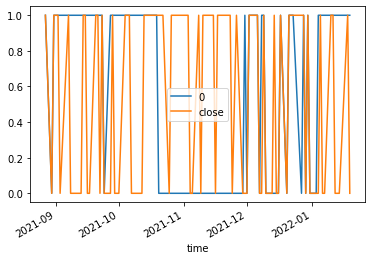

In [46]:
ax = trained_predictions.plot()
y_test.plot(ax=ax)

In [65]:
# this code gets the cumulative amount of purchase/buy signals
((trained_predictions -.5)*2).cumsum()

0
time                           
2021-08-27 00:00:00-04:00   1.0
2021-08-30 00:00:00-04:00   2.0
2021-08-31 00:00:00-04:00   3.0
2021-09-01 00:00:00-04:00   4.0
2021-09-02 00:00:00-04:00   5.0
...                         ...
2022-01-12 00:00:00-05:00  28.0
2022-01-13 00:00:00-05:00  29.0
2022-01-14 00:00:00-05:00  30.0
2022-01-18 00:00:00-05:00  31.0
2022-01-19 00:00:00-05:00  32.0

[100 rows x 1 columns]

In [66]:
trained_predictions.value_counts()

1.0    66
0.0    34
dtype: int64

In [67]:
y_test.value_counts()

close
1        56
0        44
dtype: int64

In [68]:
y_train.value_counts()

close
1        27
0        18
dtype: int64

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
accuracy_score(trained_predictions, y_test_array)

0.46

In [71]:
# begin test of output. 
# start with gain if you bought all day 1 of test period, sold all at end
# first test multiplies signal by pct change. 
# second test takes into account a starting amount of money, buys and sells a certain amount per day.
# third test keeps track of money available per day and puts a stop to buying when run out
# fourth test sells all if money is run out on next sell signal.
# fifth test sells all on next sell signal if available money is down to a third of the amount initially available.
# try to add feature to prevent any short selling when shares not available.

In [72]:
close_df[-100:]["close"]

time
2021-08-27 00:00:00-04:00    450.32
2021-08-30 00:00:00-04:00    455.90
2021-08-31 00:00:00-04:00    455.49
2021-09-01 00:00:00-04:00    456.53
2021-09-02 00:00:00-04:00    461.04
                              ...  
2022-01-12 00:00:00-05:00    525.79
2022-01-13 00:00:00-05:00    516.98
2022-01-14 00:00:00-05:00    502.99
2022-01-18 00:00:00-05:00    488.06
2022-01-19 00:00:00-05:00    494.60
Name: close, Length: 100, dtype: float64

In [73]:
# gain if you bought all day 1 and sold all at end of test period
close_df.iloc[-1]["close"]/close_df.iloc[-100]["close"]

1.0983300763901227

In [74]:
y_test.shape[0]

100

In [75]:
y_train

close
time                           
2021-06-24 00:00:00-04:00     1
2021-06-25 00:00:00-04:00     1
2021-06-28 00:00:00-04:00     1
2021-06-29 00:00:00-04:00     0
2021-06-30 00:00:00-04:00     0
2021-07-01 00:00:00-04:00     1
2021-07-02 00:00:00-04:00     0
2021-07-06 00:00:00-04:00     1
2021-07-07 00:00:00-04:00     1
2021-07-08 00:00:00-04:00     1
2021-07-09 00:00:00-04:00     0
2021-07-12 00:00:00-04:00     0
2021-07-13 00:00:00-04:00     1
2021-07-14 00:00:00-04:00     1
2021-07-15 00:00:00-04:00     0
2021-07-16 00:00:00-04:00     1
2021-07-19 00:00:00-04:00     1
2021-07-20 00:00:00-04:00     0
2021-07-21 00:00:00-04:00     1
2021-07-22 00:00:00-04:00     1
2021-07-23 00:00:00-04:00     0
2021-07-26 00:00:00-04:00     1
2021-07-27 00:00:00-04:00     0
2021-07-28 00:00:00-04:00     1
2021-07-29 00:00:00-04:00     1
2021-07-30 00:00:00-04:00     0
2021-08-02 00:00:00-04:00     1
2021-08-03 00:00:00-04:00     0
2021-08-04 00:00:00-04:00     1
2021-08-05 00:00:00-04:00     0
2021-08-06 00:00:00-04:00     1
2021-08-09 00:00:00-04:00     1
2021-08-10 00:00:00-04:00     1
2021-08-11 00:00:00-04:00     1
2021-08-12 00:00:00-04:00     1
2021-08-13 00:00:00-04:00     1
2021-08-16 00:00:00-04:00     0
2021-08-17 00:00:00-04:00     0
2021-08-18 00:00:00-04:00     1
2021-08-19 00:00:00-04:00     1
2021-08-20 00:00:00-04:00     0
2021-08-23 00:00:00-04:00     0
2021-08-24 00:00:00-04:00     0
2021-08-25 00:00:00-04:00     0
2021-08-26 00:00:00-04:00     1

In [76]:
# get a read on how many trades above or below zero will be in the trade signal cumulative output
print(((y_train - .5) * 2).cumsum().max())
print(((y_train - .5) * 2).cumsum().min())

close    12.0
dtype: object
close    1.0
dtype: object


In [77]:
#get shorter close_df_test dataframe with only the test indexes

close_df_test = pd.DataFrame(close_df["close"]).loc[X_test.index]


In [78]:
close_df_test

close
time                             
2021-08-27 00:00:00-04:00  450.32
2021-08-30 00:00:00-04:00  455.90
2021-08-31 00:00:00-04:00  455.49
2021-09-01 00:00:00-04:00  456.53
2021-09-02 00:00:00-04:00  461.04
...                           ...
2022-01-12 00:00:00-05:00  525.79
2022-01-13 00:00:00-05:00  516.98
2022-01-14 00:00:00-05:00  502.99
2022-01-18 00:00:00-05:00  488.06
2022-01-19 00:00:00-05:00  494.60

[100 rows x 1 columns]

In [50]:
# initiate start money amount and 0 shares held.
start_money = 10000
shares = 0
shares_df = pd.DataFrame(np.zeros(shape=y_test.shape[0]), index=y_test.index)
money_on_hand_df = pd.DataFrame(np.zeros(shape=y_test.shape[0]), index=y_test.index)
value_on_hand_df = pd.DataFrame(np.zeros(shape=y_test.shape[0]), index=y_test.index)
money_on_hand = start_money
trade_amount=600

In [80]:
# get appropriate daily buy/sell amount per start money
# trade_amount = (start_money / ((y_train - .5) * 2).cumsum().max())["close"] #conservative amount expecting to not go under on money
trade_amount=600 # a more aggressive amount expecting to go short on money or shares

In [82]:
trade_amount

600

In [83]:
trained_predictions[0]

time
2021-08-27 00:00:00-04:00    1.0
2021-08-30 00:00:00-04:00    1.0
2021-08-31 00:00:00-04:00    1.0
2021-09-01 00:00:00-04:00    1.0
2021-09-02 00:00:00-04:00    1.0
                            ... 
2022-01-12 00:00:00-05:00    1.0
2022-01-13 00:00:00-05:00    1.0
2022-01-14 00:00:00-05:00    1.0
2022-01-18 00:00:00-05:00    1.0
2022-01-19 00:00:00-05:00    1.0
Name: 0, Length: 100, dtype: float32

In [84]:
cross_df

close to 2  close to 3  close to 5  close to 8  \
time                                                                        
2020-09-08 00:00:00-04:00           0           0           0           0   
2020-09-09 00:00:00-04:00           0           0           0           0   
2020-09-10 00:00:00-04:00          -1           0           0           0   
2020-09-11 00:00:00-04:00           0           0           0           0   
2020-09-14 00:00:00-04:00           1           1           0           0   
...                               ...         ...         ...         ...   
2022-01-12 00:00:00-05:00           0           1           0           0   
2022-01-13 00:00:00-05:00          -1          -1           0           0   
2022-01-14 00:00:00-05:00           0           0           0           0   
2022-01-18 00:00:00-05:00           0           0           0           0   
2022-01-19 00:00:00-05:00           1           0           0           0   

                           close to 10  close to 13  close to 20  close to 21  \
time                                                                            
2020-09-08 00:00:00-04:00            0            0            0            0   
2020-09-09 00:00:00-04:00            0            0            0            0   
2020-09-10 00:00:00-04:00            0            0            0            0   
2020-09-11 00:00:00-04:00            0            0            0            0   
2020-09-14 00:00:00-04:00            0            0            0            0   
...                                ...          ...          ...          ...   
2022-01-12 00:00:00-05:00            0            0            0            0   
2022-01-13 00:00:00-05:00            0            0            0            0   
2022-01-14 00:00:00-05:00            0            0            0            0   
2022-01-18 00:00:00-05:00            0            0            0            0   
2022-01-19 00:00:00-05:00            0            0            0            0   

                           close to 34  close to 50  ...  55 to 89  55 to 100  \
time                                                 ...                        
2020-09-08 00:00:00-04:00            0            0  ...         0          0   
2020-09-09 00:00:00-04:00            0            0  ...         0          0   
2020-09-10 00:00:00-04:00            0            0  ...         0          0   
2020-09-11 00:00:00-04:00            0            0  ...         0          0   
2020-09-14 00:00:00-04:00            0            0  ...         0          0   
...                                ...          ...  ...       ...        ...   
2022-01-12 00:00:00-05:00            0            0  ...         0          0   
2022-01-13 00:00:00-05:00            0            0  ...         0          0   
2022-01-14 00:00:00-05:00            0            0  ...         0          0   
2022-01-18 00:00:00-05:00            0            0  ...         0          0   
2022-01-19 00:00:00-05:00            0            0  ...         0          0   

                           55 to 144  55 to 200  89 to 100  89 to 144  \
time                                                                    
2020-09-08 00:00:00-04:00          0          0          0          0   
2020-09-09 00:00:00-04:00          0          0          0          0   
2020-09-10 00:00:00-04:00          0          0          0          0   
2020-09-11 00:00:00-04:00          0          0          0          0   
2020-09-14 00:00:00-04:00          0          0          0          0   
...                              ...        ...        ...        ...   
2022-01-12 00:00:00-05:00          0          0          0          0   
2022-01-13 00:00:00-05:00          0          0          0          0   
2022-01-14 00:00:00-05:00          0          0          0          0   
2022-01-18 00:00:00-05:00          0          0          0          0   
2022-01-19 00:00:00-05:00          0     

In [85]:
cross_cols = cross_df.columns

In [86]:
# test all SMA vs LMA crossover signals as buy/sell signals
# cross_df

# start_money_reset = 10000
# shares_reset = 0

# shares_df = pd.DataFrame(np.zeros(shape=cross_df.shape), index=cross_df.index, columns = cross_cols)
# money_on_hand_df = pd.DataFrame(np.zeros(shape=cross_df.shape), index=cross_df.index, columns = cross_cols)
# value_on_hand_df = pd.DataFrame(np.zeros(shape=cross_df.shape), index=cross_df.index, columns = cross_cols)



# for col in cross_cols:
#     money_on_hand = start_money_reset
#     shares = shares_reset
#     for day in range(len(cross_df)):
#         shares_df[col].iloc[day] = shares
#         money_on_hand_df[col].iloc[day] = money_on_hand
#         value_on_hand_df[col].iloc[day] = (shares * close_df.iloc[day]["close"]) + money_on_hand
#         if (cross_df[col].iloc[day] == -1) & (shares > 0):
#             money_on_hand = shares * close_df.iloc[day]["close"]
#             shares = 0
#         elif (cross_df[col].iloc[day] == 1) & (money_on_hand > 0):
#             shares = money_on_hand / close_df.iloc[day]["close"]
#             money_on_hand = 0
            

In [87]:
import hvplot.pandas
%matplotlib inline

In [88]:
value_on_hand_df.hvplot()

:Curve   [time]   (0)

In [89]:
close_df["close"].iloc[-1]/close_df["close"].iloc[0]

1.459556762180187

In [51]:
# initiate start money amount and 0 shares held.
start_money = 10000
shares = 0
shares_df = pd.DataFrame(np.zeros(shape=y_test.shape[0]), index=y_test.index)
money_on_hand_df = pd.DataFrame(np.zeros(shape=y_test.shape[0]), index=y_test.index)
value_on_hand_df = pd.DataFrame(np.zeros(shape=y_test.shape[0]), index=y_test.index)
money_on_hand = start_money
trade_amount=600

In [52]:
close_df_test = pd.DataFrame(close_df["close"]).loc[X_test.index]

In [53]:
money_on_hand_df, shares_df, value_on_hand_df = results_trade_amount_nostop(close_df_test, trained_predictions, trade_amount)



In [54]:
# test to add up all exercises, no stops or changes to purchase/sell amount in place.

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
#     if trained_predictions.iloc[day][0] == 0:
#         shares -= trade_amount / close_df_test.iloc[day]["close"]
#         money_on_hand += trade_amount
#     elif trained_predictions.iloc[day][0] == 1:
#         shares += trade_amount / close_df_test.iloc[day]["close"]
#         money_on_hand -= trade_amount

In [55]:
# # # alternate test to add up all exercises, stops in place to prevent negative money or shares.

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
#     if (trained_predictions.iloc[day][0] == 0) & (shares - trade_amount / close_df_test.iloc[day]["close"] >= 0):
#         shares -= trade_amount / close_df_test.iloc[day]["close"]
#         money_on_hand += trade_amount
#     elif (trained_predictions.iloc[day][0] == 1) & (money_on_hand - trade_amount >= 0):
#         shares += trade_amount / close_df_test.iloc[day]["close"]
#         money_on_hand -= trade_amount

In [56]:
# alternate test to add up all exercises, stops in place to prevent negative money or shares. 
# also increases sell amount on sell price if money supply is low.

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
#     if (trained_predictions.iloc[day][0] == 0) & (shares - trade_amount / close_df_test.iloc[day]["close"] >= 0):
#         if (money_on_hand < start_money/3):
#             shares -= (trade_amount / close_df_test.iloc[day]["close"])*3
#             money_on_hand += trade_amount*3
#         else:
#             shares -= trade_amount / close_df_test.iloc[day]["close"]
#             money_on_hand += trade_amount
#     elif (trained_predictions.iloc[day][0] == 1) & (money_on_hand - trade_amount >= 0):
#         shares += trade_amount / close_df_test.iloc[day]["close"]
#         money_on_hand -= trade_amount

In [57]:
# # alternate test to add up all exercises, stops in place to prevent negative money or shares. 
# # if money is low, sell 1/3 of all shares. else execute trade per signal

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
#     if money_on_hand < (start_money/3):
#         money_on_hand += 1/3 *shares * close_df_test.iloc[day]["close"]
#         shares = shares*2/3
#     else:
#         if (trained_predictions.iloc[day][0] == 0) & (shares - trade_amount / close_df_test.iloc[day]["close"] >= 0):
#             shares -= trade_amount / close_df_test.iloc[day]["close"]
#             money_on_hand += trade_amount
#         elif (trained_predictions.iloc[day][0] == 1) & (money_on_hand - trade_amount >= 0):
#             shares += trade_amount / close_df_test.iloc[day]["close"]
#             money_on_hand -= trade_amount

In [58]:
# # alternate test to add up all exercises, stops in place to prevent negative money or shares. 
# # also if money supply is low, sell 2/3 of shares next sell signal

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
#     if (trained_predictions.iloc[day][0] == 0) & (shares - trade_amount / close_df_test.iloc[day]["close"] >= 0):
#         if (money_on_hand < start_money/3):
#             money_on_hand += 2/3*shares * close_df_test.iloc[day]["close"]
#             shares = shares/3
#         else:
#             shares -= trade_amount / close_df_test.iloc[day]["close"]
#             money_on_hand += trade_amount
#     elif (trained_predictions.iloc[day][0] == 1) & (money_on_hand - trade_amount >= 0):
#         shares += trade_amount / close_df_test.iloc[day]["close"]
#         money_on_hand -= trade_amount

In [59]:
# alternate test to add up all exercises, stops in place to prevent negative money or shares. 
# also if money supply is less than half, sell half of shares next sell signal

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
#     if (trained_predictions.iloc[day][0] == 0) & (shares - trade_amount / close_df_test.iloc[day]["close"] >= 0):
#         if (money_on_hand < start_money/2):
#             money_on_hand += 1/2*shares * close_df_test.iloc[day]["close"]
#             shares = shares/2
#         else:
#             shares -= trade_amount / close_df_test.iloc[day]["close"]
#             money_on_hand += trade_amount
#     elif (trained_predictions.iloc[day][0] == 1) & (money_on_hand - trade_amount >= 0):
#         shares += trade_amount / close_df_test.iloc[day]["close"]
#         money_on_hand -= trade_amount

In [60]:
# alternate strategy. buy all on buy signal, sell all on sell signal, if available.

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
#     if (trained_predictions.iloc[day][0] == 0) & (shares > 0):
#         money_on_hand = shares * close_df_test.iloc[day]["close"]
#         shares = 0
#     elif (trained_predictions.iloc[day][0] == 1) & (money_on_hand > 0):
#         shares = money_on_hand / close_df_test.iloc[day]["close"]
#         money_on_hand = 0


In [61]:
# alternate strategy. spend half of available money on buy signal, sell half of available shares on sell signal.

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
#     if (trained_predictions.iloc[day][0] == 0) & (shares > 0):
#         money_on_hand += (shares/2) * close_df_test.iloc[day]["close"]
#         shares = shares/2
#     elif (trained_predictions.iloc[day][0] == 1) & (money_on_hand > 0):
#         shares += (money_on_hand/2) / close_df_test.iloc[day]["close"]
#         money_on_hand = money_on_hand/2

In [62]:
# # alternate strategy to buy or sell based on cross_signals_weighted sum

# general_trade = 3000

# for day in range(len(trained_predictions)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df_test.iloc[day]["close"]) + money_on_hand
#     money_on_hand -= general_trade * cross_signals_weighted.iloc[day] * close_df_test.iloc[day]["close"]
#     shares += general_trade * cross_signals_weighted.iloc[day]


In [63]:
# function to get log of positive, negative log of negative, and return 0 for 0

cross_signals_weighted_log = pd.DataFrame(np.zeros(shape=cross_signals_weighted.shape[0]), index=cross_signals_weighted.index)

for day in range(len(cross_signals_weighted)):
    if (cross_signals_weighted.iloc[day][0] > 0) * 1:
        cross_signals_weighted_log.iloc[day] = np.log(cross_signals_weighted.iloc[day])
    elif (cross_signals_weighted.iloc[day][0] < 0) * 1:
        cross_signals_weighted_log.iloc[day] = -np.log(-cross_signals_weighted.iloc[day])

In [64]:
cross_signals_weighted_log

0
time                               
2020-09-08 00:00:00-04:00  0.000000
2020-09-09 00:00:00-04:00  0.000000
2020-09-10 00:00:00-04:00  3.862792
2020-09-11 00:00:00-04:00  4.516130
2020-09-14 00:00:00-04:00 -3.499509
...                             ...
2022-01-12 00:00:00-05:00 -4.657127
2022-01-13 00:00:00-05:00  3.009094
2022-01-14 00:00:00-05:00  2.797342
2022-01-18 00:00:00-05:00  1.979616
2022-01-19 00:00:00-05:00 -4.476394

[345 rows x 1 columns]

In [65]:
cross_signals_weighted

0
time                               
2020-09-08 00:00:00-04:00  0.000000
2020-09-09 00:00:00-04:00  0.000000
2020-09-10 00:00:00-04:00 -0.021009
2020-09-11 00:00:00-04:00 -0.010931
2020-09-14 00:00:00-04:00  0.030212
...                             ...
2022-01-12 00:00:00-05:00  0.009494
2022-01-13 00:00:00-05:00 -0.049336
2022-01-14 00:00:00-05:00 -0.060972
2022-01-18 00:00:00-05:00 -0.138122
2022-01-19 00:00:00-05:00  0.011374

[345 rows x 1 columns]

In [66]:
# alternate method to weight cross weighted signal sums 
cross_signals_weighted = cross_signals_weighted[0] - cross_signals_weighted.mean()

In [67]:
cross_signals_weighted

2020-09-08 00:00:00-04:00   NaN
2020-09-09 00:00:00-04:00   NaN
2020-09-10 00:00:00-04:00   NaN
2020-09-11 00:00:00-04:00   NaN
2020-09-14 00:00:00-04:00   NaN
                             ..
2022-01-13 00:00:00-05:00   NaN
2022-01-14 00:00:00-05:00   NaN
2022-01-18 00:00:00-05:00   NaN
2022-01-19 00:00:00-05:00   NaN
0                           NaN
Length: 346, dtype: float64

In [68]:
close_df.iloc[0]["close"]

338.87

In [69]:
# abandoned, maybe work on another time

# # alternate start frames for alternate log crossover slope signal
# start_money = 10000
# shares = 0
# shares_df = pd.DataFrame(np.zeros(shape=cross_signals_weighted.shape[0]), index=cross_signals_weighted.index)
# money_on_hand_df = pd.DataFrame(np.zeros(shape=cross_signals_weighted.shape[0]), index=cross_signals_weighted.index)
# value_on_hand_df = pd.DataFrame(np.zeros(shape=cross_signals_weighted.shape[0]), index=cross_signals_weighted.index)
# money_on_hand = start_money


# # alternate strategy to buy or sell based on natural log of cross_signals_weighted sum

# general_trade = 300

# for day in range(len(cross_signals_weighted)):
#     shares_df.iloc[day][0] = shares
#     money_on_hand_df.iloc[day][0] = money_on_hand
#     value_on_hand_df.iloc[day][0] = (shares * close_df.iloc[day]["close"]) + money_on_hand
#     money_on_hand -= general_trade * cross_signals_weighted_log.iloc[day] 
#     shares += general_trade * cross_signals_weighted_log.iloc[day] / close_df.iloc[day]["close"]

In [70]:
shares_df

0
time                                
2021-08-27 00:00:00-04:00   0.000000
2021-08-30 00:00:00-04:00   1.332386
2021-08-31 00:00:00-04:00   0.016308
2021-09-01 00:00:00-04:00   1.333570
2021-09-02 00:00:00-04:00   2.647832
...                              ...
2022-01-12 00:00:00-05:00  17.644555
2022-01-13 00:00:00-05:00  18.785695
2022-01-14 00:00:00-05:00  19.946282
2022-01-18 00:00:00-05:00  21.139148
2022-01-19 00:00:00-05:00  22.368505

[100 rows x 1 columns]

In [71]:
# check lowest and highest amount of shares held at any one time in test
print(shares_df.min())
print(shares_df.max())

0    0.0
dtype: float64
0    43.56793
dtype: float64


In [72]:
# check lowest and highest amount of money held at any one time in test
print(money_on_hand_df.min())
print(money_on_hand_df.max())

0   -9800.0
dtype: float64
0    10000.0
dtype: float64


In [73]:
money_on_hand_df

0
time                              
2021-08-27 00:00:00-04:00  10000.0
2021-08-30 00:00:00-04:00   9400.0
2021-08-31 00:00:00-04:00  10000.0
2021-09-01 00:00:00-04:00   9400.0
2021-09-02 00:00:00-04:00   8800.0
...                            ...
2022-01-12 00:00:00-05:00   3400.0
2022-01-13 00:00:00-05:00   2800.0
2022-01-14 00:00:00-05:00   2200.0
2022-01-18 00:00:00-05:00   1600.0
2022-01-19 00:00:00-05:00   1000.0

[100 rows x 1 columns]

In [74]:
money_on_hand_df.min()

0   -9800.0
dtype: float64

<AxesSubplot:xlabel='time'>

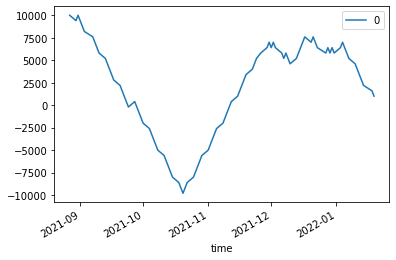

In [75]:
money_on_hand_df.plot()

<AxesSubplot:xlabel='time'>

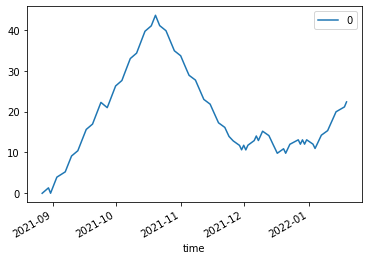

In [76]:
shares_df.plot()

In [77]:
value_of_shares_df=pd.DataFrame(shares_df[0].loc[:]*close_df.loc[:]["close"])

<AxesSubplot:xlabel='time'>

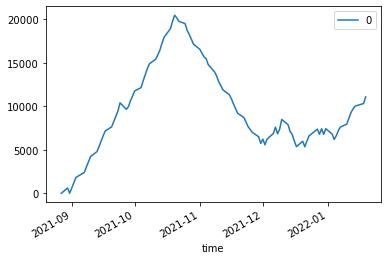

In [78]:
value_of_shares_df.plot()

In [79]:
value_of_shares_df

0
time                                   
2020-09-08 00:00:00-04:00           NaN
2020-09-09 00:00:00-04:00           NaN
2020-09-10 00:00:00-04:00           NaN
2020-09-11 00:00:00-04:00           NaN
2020-09-14 00:00:00-04:00           NaN
...                                 ...
2022-01-12 00:00:00-05:00   9277.330679
2022-01-13 00:00:00-05:00   9711.828704
2022-01-14 00:00:00-05:00  10032.780223
2022-01-18 00:00:00-05:00  10317.172739
2022-01-19 00:00:00-05:00  11084.712844

[345 rows x 1 columns]

In [80]:
# value_on_hand_df = value_of_shares_df[0] + money_on_hand_df[0]

In [81]:
value_on_hand_df

0
time                                   
2021-08-27 00:00:00-04:00  10000.000000
2021-08-30 00:00:00-04:00  10007.434713
2021-08-31 00:00:00-04:00  10007.428027
2021-09-01 00:00:00-04:00  10008.814940
2021-09-02 00:00:00-04:00  10020.756664
...                                 ...
2022-01-12 00:00:00-05:00  12677.330679
2022-01-13 00:00:00-05:00  12511.828704
2022-01-14 00:00:00-05:00  12232.780223
2022-01-18 00:00:00-05:00  11917.172739
2022-01-19 00:00:00-05:00  12084.712844

[100 rows x 1 columns]

In [82]:
normalized_close_df = start_money * close_df_test["close"]/close_df_test.iloc[0]["close"]

<AxesSubplot:xlabel='time'>

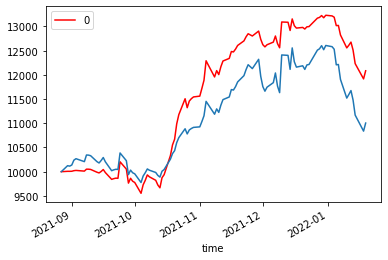

In [83]:
ax = value_on_hand_df.plot(color = "red")
normalized_close_df.plot(ax=ax)

In [121]:
value_on_hand_df = sma_crossover_eval(start_money, cross_df, close_df)

In [122]:
# alternate test for entire timeframe using log crossover slope difference
normalized_full_close_df = start_money * close_df["close"]/close_df.iloc[0]["close"]

In [125]:
value_on_hand_df.hvplot()

:NdOverlay   [Variable]
   :Curve   [time]   (value)

<AxesSubplot:xlabel='time'>

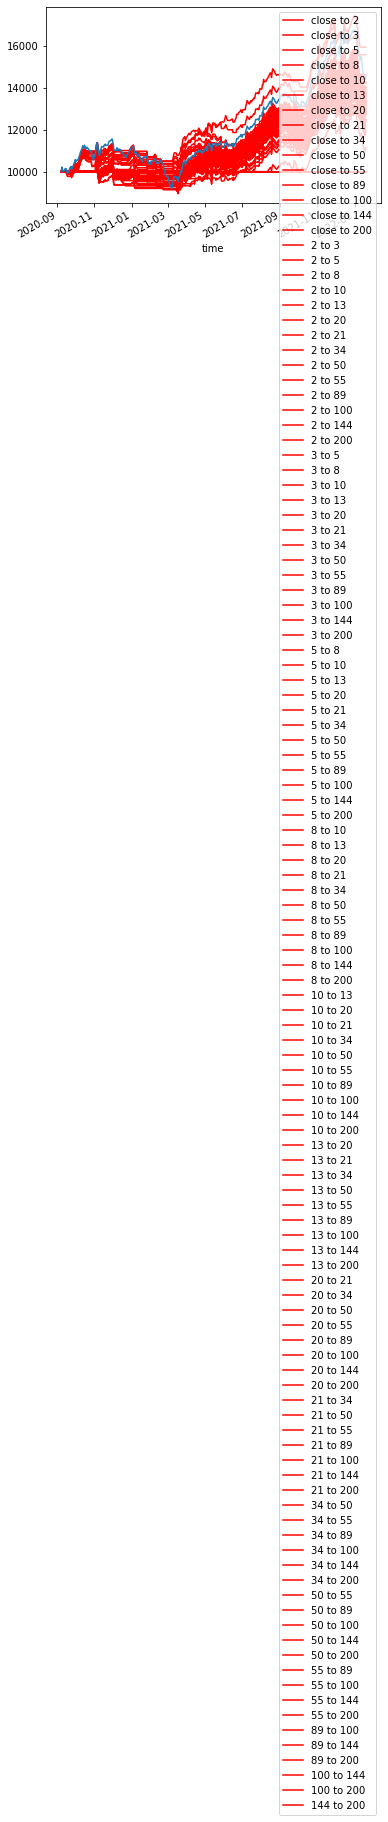

In [123]:
# alternate test for entire timeframe using log crossover slope difference
ax = value_on_hand_df.plot(color = "red")
normalized_full_close_df.plot(ax=ax)

<AxesSubplot:xlabel='time'>

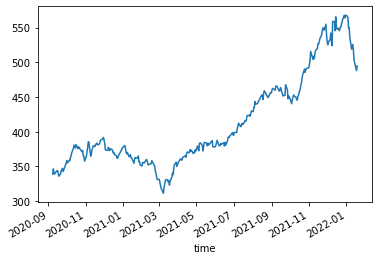

In [124]:
close_df["close"].plot()

In [84]:
money_on_hand

10000

In [85]:
shares

0

In [86]:
end_money = money_on_hand + shares * close_df.iloc[-1]["close"]

In [87]:
end_money

10000.0

In [88]:
# gain if strategy implemented
end_money/start_money

1.0

In [89]:
value_on_hand_df.iloc[-1]/value_on_hand_df.iloc[0]

0    1.208471
dtype: float64

In [90]:
# gain if you bought all day 1 and sold all at end of test period
close_df.iloc[-1]["close"]/close_df.iloc[-100]["close"]

1.1004396873334519

In [91]:
# # pseudocode outline:

# function to get price history - args are stock ticker/s, amount of days
# 	call alpaca
# 	return dataframe

# function to get twitter history
# 	possibly filter for repeated tweets
# 	return signal

# function to get news history
# 	return signal

# function to get reddit history
# 	return signal

# function to get general sentiment signals history
# 	call function to get twitter history
# 	call function to get news history
# 	call function to get reddit history
# 	return combined dataframe of signals


# function to get sentiment signals history of specific stock - arg is stock ticker
# 	call function to get twitter history
# 	call function to get news history
# 	call function to get reddit history
# 	return combined dataframe of signals

# function to run machine learning - arg is combined signals and stock history
# 	add additional columns for each signal for a daily percent change and a 5 day moving average a 100 day moving average
# 	scale
# 	train/test split
# 	try a few machine learning possibilities, svm, adaboost, possibly neural - try to guess if it will go up or down the following day

# 	try the following : reduce overfitting with early stopping
	
# 	neural - y is determined by whether it goes up or down the following day. two output neurons, highest one is selected to make signal.
# 	check amount correct, amount incorrect, and difference between actual and strategy.	

# 	neural 2nd stage - train only on the indexes which were incorrectly predicted.

	




# 	return buy/sell signal

# make function to calculate returns:
# don't use the function that just multiplies the signals by pct_return
# track the amount spent on each buy and amount returned on each sell.
# plot the total amount invested at any one time.
# possibly put a cutoff if no more money is available.
# possibly put a stop if unable to sell short.
# at the end, sell all or buy all short positions, get end result.
# compare to if the full amount initially available was all spent to purchase the stock at
# the beginning of the test period.


# Main function:
# 	determine which stocks to pull, one or many

# 	call function to get price history

# 	call function to get general sentiment signals history

# 	call function to get sentiment signals history for specific stock/s

# 	call function to run machine learning on the price history and signals

# 	output graphs





# terms to use in signal search for general:
# green
# renewable
# environment
# climate
# global warming
# climate crisis
# natural disaster
